#  In this project, I will analyze a dataset related to electric vehicles (EVs). 
# The dataset contains various features such as electric range, energy consumption, price, and other relevant attributes. 
# MY goal is to conduct a thorough analysis to uncover meaningful insights, tell a
# compelling story, conduct hypothesis testing and provide actionable recommendations based on the data.

## Imported all the libraries and handled the missing values.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loaded the EV dataset from the Excel file into a DataFrame for analysis
carinfo = pd.read_excel("FEV-data-Excel.xlsx")

In [3]:
# Some columns have missing values which are filled with median and mode respectively.

# Selected numerical columns where missing values will be filled using the median
median_cols = [
    "Permissable gross weight [kg]",
    "Maximum load capacity [kg]",
    "Boot capacity (VDA) [l]",
    "Acceleration 0-100 kph [s]",
    "mean - Energy consumption [kWh/100 km]"
]

# Filled numerical missing values with median
carinfo[median_cols] = carinfo[median_cols].fillna(carinfo[median_cols].median())

# Filled categorical missing value with mode
carinfo["Type of brakes"] = carinfo["Type of brakes"].fillna(carinfo["Type of brakes"].mode()[0])


carinfo.info() #NOw the data is ready for analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          53 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


# Task 1: 
## A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km.

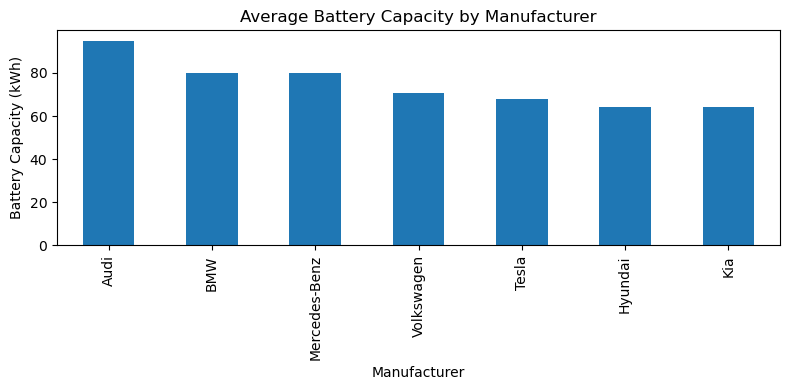

In [4]:
#filtered out EVs that meet these criteria
filtered_data = carinfo[(carinfo["Minimal price (gross) [PLN]"] <= 350000) & (carinfo["Range (WLTP) [km]"] >= 400)]

#Calculated the average battery capacity  and Grouped them by the manufacturer
avg_battery_cap_by_make = filtered_data.groupby("Make")["Battery capacity [kWh]"].mean().sort_values(ascending=False)

#Visualized the average battery capacity for each manufacturer
avg_battery_cap_by_make.plot(kind='bar', figsize=(8,4), title='Average Battery Capacity by Manufacturer')
plt.ylabel('Battery Capacity (kWh)')
plt.xlabel('Manufacturer')
plt.tight_layout()
plt.show()


# My Analysis

### Audi tops the chart, signaling long-range luxury and premium engineering.
### BMW and Mercedes-Benz stay close, delivering solid performance in the high-end EV space.
### Tesla, Hyundai, and Kia show leaner battery profiles—likely optimizing for efficiency, affordability, or smart design.


## -----------------------------------------------------------------------------------------------

# Task 2: 
## Suspected some EVs have unusually high or low energy consumption.

In [5]:
# Solution for this is to find 
# the outliers in the mean- Energy consumption [kWh/100 km] column.

#calculated z score to measure how far each value is from the mean in terms of standard deviation
zscore = np.abs(stats.zscore(carinfo["mean - Energy consumption [kWh/100 km]"]))

# took threshold as 2 to filter out outliers
outliers = carinfo[zscore > 2]

#print the output with the specific columns
print("Energy Consumption Outliers:")
outliers[["Make", "Model", "mean - Energy consumption [kWh/100 km]"]]



Energy Consumption Outliers:


,Make,Model,mean - Energy consumption [kWh/100 km]
2,Audi,e-tron S quattro,27.55
5,Audi,e-tron Sportback S quattro,27.20
51,Mercedes-Benz,EQV (long),28.20


## My analysis
1.Audi e-tron S & Sportback S has 
High energy use which reflects performance.

2.Mercedes-Benz EQV (long)
, its elevated consumption aligns with its van format—built for space and utility.

## -----------------------------------------------------------------------------------------------

# Task 3: 
## My manager wants to know if there's a strong relationship between battery capacity and range.


Pearson correlation coefficient: 0.81
P-value: 0.0000


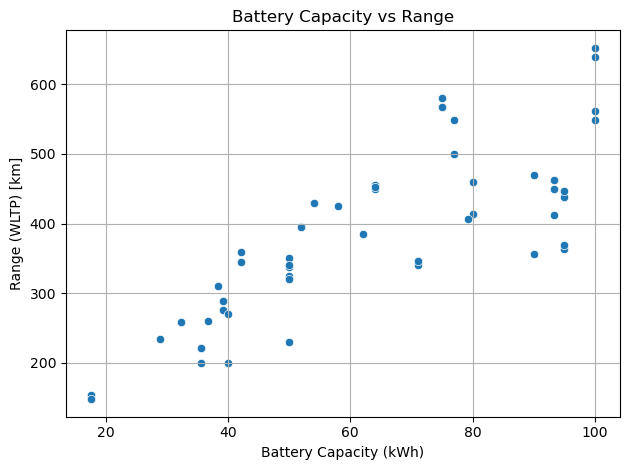

In [6]:
from scipy.stats import pearsonr

# Used correlation and p value to find relationship b/w range and capacity
corr, p_value = pearsonr(carinfo["Battery capacity [kWh]"], carinfo["Range (WLTP) [km]"])
print(f"Pearson correlation coefficient: {corr:.2f}")
print(f"P-value: {p_value:.4f}")

#Created a scatter plot to visualize.
x = carinfo["Battery capacity [kWh]"]
y = carinfo["Range (WLTP) [km]"]

sns.scatterplot(x=x, y=y)
plt.title("Battery Capacity vs Range")
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Range (WLTP) [km]")
plt.grid(True)
plt.tight_layout()
plt.show()

# Insights

### Strong Correlation confirms positive relationship—larger batteries generally deliver longer range.

### Some EVs achieve high range with smaller batteries, indicating smart energy optimization.

### Premium models cluster in the high-capacity, high-range zone; others focus on efficiency over size.


## -----------------------------------------------------------------------------------------------

 # Task 4: 
 ### Build an EV recommendation class.

In [7]:
#This class should allow users to input their budget, desired range, and battery capacity. 
#It should return the top three EVs matching their criteria.
class EVRecommender:
    def __init__(self, data):
        self.data = data.copy()

    def recommend(self):
        try:
            #To take user input 
            budget = int(input("Enter your budget (in PLN): "))
            min_range = int(input("Enter your desired minimum range (in km): "))
            min_capacity = float(input("Enter your minimum battery capacity (in kWh): "))

            # To filter based on criteria
            filtered = self.data[
                (self.data["Minimal price (gross) [PLN]"] <= budget) &
                (self.data["Range (WLTP) [km]"] >= min_range) &
                (self.data["Battery capacity [kWh]"] >= min_capacity)
            ].copy()

            # This will sort and return top 3
            top_ev = filtered.sort_values(by="Range (WLTP) [km]", ascending=False).head(3)

            print("\nTop 3 EVs matching your criteria:\n")
            print(top_ev[[
                "Car full name",
                "Minimal price (gross) [PLN]"
            ]])

        except ValueError:
            print("Invalid input. Please enter numeric values only.")


recommender = EVRecommender(filtered_data)
recommender.recommend()

Enter your budget (in PLN):  180000
Enter your desired minimum range (in km):  250
Enter your minimum battery capacity (in kWh):  45



Top 3 EVs matching your criteria:

            Car full name  Minimal price (gross) [PLN]
48  Volkswagen ID.3 Pro S                       179990
18       Kia e-Niro 64kWh                       167990
20       Kia e-Soul 64kWh                       160990


## -----------------------------------------------------------------------------------------------

# TASK 5:
## Inferential Statistics– Hypothesis Testing:

In [8]:
# Imported t-test function from scipy.stats
from scipy.stats import ttest_ind

# Assigned variables to extract engine power values for Tesla and Audi.
tesla_power = carinfo[carinfo["Make"] == "Tesla"]["Engine power [KM]"]
audi_power = carinfo[carinfo["Make"] == "Audi"]["Engine power [KM]"]

# Two-sample t-test to compare the average engine power between Tesla and Audi
t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)

# Display the test statistic and p-value for interpretation
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print("Since the p-value is 0.1068 (> 0.05)")
print("There is no statistically significant difference in avg engine power between Tesla and Audi EVs at the 95% confidence level.")


T-statistic: 1.79
P-value: 0.1068
Since the p-value is 0.1068 (> 0.05)
There is no statistically significant difference in avg engine power between Tesla and Audi EVs at the 95% confidence level.


# Insights:
### Despite Tesla’s reputation for performance, Audi’s EVs appear comparable in engine power.

### This could suggest that Audi is competitive in the high-performance EV segment, which may surprise some stakeholders.

### It also implies that engine power alone may not be a differentiator between these brands — other factors like acceleration, torque, or battery efficiency might be more telling.

# Recommendations & Conclusion
### Marketing teams should highlight Audi’s parity in engine power to challenge Tesla’s dominance narrative.

### Product teams might explore differentiating features beyond raw power — such as charging speed, driving experience, or tech integration.

### Consider extending the analysis to include acceleration, torque, or energy efficiency for a more holistic performance comparison.

## ---------------------------------------------------------------------------------------

# TASK 6:
### video explaintion : https://drive.google.com/file/d/1Lm3kShY-wIV62Gn-5iUbnKuIxnD1CBZP/view?usp=drive_link

In [15]:

print("╔═════════════════════════════════════════════════════════╗")
print("          THANK YOU ,Your feedback WILL BE helpful.")
print("╚═════════════════════════════════════════════════════════╝")




╔═════════════════════════════════════════════════════════╗
          THANK YOU ,Your feedback WILL BE helpful.
╚═════════════════════════════════════════════════════════╝
